In [1]:
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from GridSearch import *


In [4]:

# Loading covid dataset
headers, X, Y = load_covid_data()

M = 10000 #chosen number of data points
#n = len(Y)
#m = int(n/M)
#random_index = np.random.randint(m)*M   
#new_X = X[random_index:random_index+M]
#new_Y = Y[random_index:random_index+M]

new_X = X[0:M]
new_Y = Y[0:M]


X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size = 0.25)

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Hyper parameters for model:
(hidden_layer_sizes: Any = (100, ), activation: str = "relu", *, solver: str = "adam", alpha: float = 0.0001, batch_size: str = "auto", learning_rate: str = "constant", learning_rate_init: float = 0.001, power_t: float = 0.5, max_iter: int = 200, shuffle: bool = True, random_state: Any | None = None, tol: float = 0.0001, verbose: bool = False, warm_start: bool = False, momentum: float = 0.9, nesterovs_momentum: bool = True, early_stopping: bool = False, validation_fraction: float = 0.1, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-8, n_iter_no_change: int = 10, max_fun: int = 15000) -> None

Relevant for project are: alpha, batch_size, learning_rate_init, momentum
max_iter for epoch plot (if using adam solver)
Alpha is for L2 regularization
Might want to change learning_rate from constant

activation functions we use: relu, tanh, logistic (sigmoid)


In [21]:

layers = [18,15,12,8]
model = MLPClassifier(hidden_layer_sizes=layers, activation="relu", max_iter=500, alpha=1.0,)
model.fit(X_train, Y_train)

MLPClassifier(alpha=1.0, hidden_layer_sizes=[18, 15, 12, 8], max_iter=500)

In [22]:

Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

[[2026  157]
 [ 104  213]]
0.8956


alpha:1e-05, momentum :1e-06 gives accuracy 0.8988
alpha:1e-05, momentum :1e-05 gives accuracy 0.9048
alpha:1e-05, momentum :0.0001 gives accuracy 0.8952
alpha:1e-05, momentum :0.001 gives accuracy 0.8948
alpha:1e-05, momentum :0.01 gives accuracy 0.8864
alpha:1e-05, momentum :0.1 gives accuracy 0.9036
alpha:1e-05, momentum :1.0 gives accuracy 0.9024
alpha:0.0001, momentum :1e-06 gives accuracy 0.9036
alpha:0.0001, momentum :1e-05 gives accuracy 0.9068
alpha:0.0001, momentum :0.0001 gives accuracy 0.8904
alpha:0.0001, momentum :0.001 gives accuracy 0.9092
alpha:0.0001, momentum :0.01 gives accuracy 0.8972
alpha:0.0001, momentum :0.1 gives accuracy 0.8944
alpha:0.0001, momentum :1.0 gives accuracy 0.9012
alpha:0.001, momentum :1e-06 gives accuracy 0.9
alpha:0.001, momentum :1e-05 gives accuracy 0.896
alpha:0.001, momentum :0.0001 gives accuracy 0.9052
alpha:0.001, momentum :0.001 gives accuracy 0.894
alpha:0.001, momentum :0.01 gives accuracy 0.908
alpha:0.001, momentum :0.1 gives accur

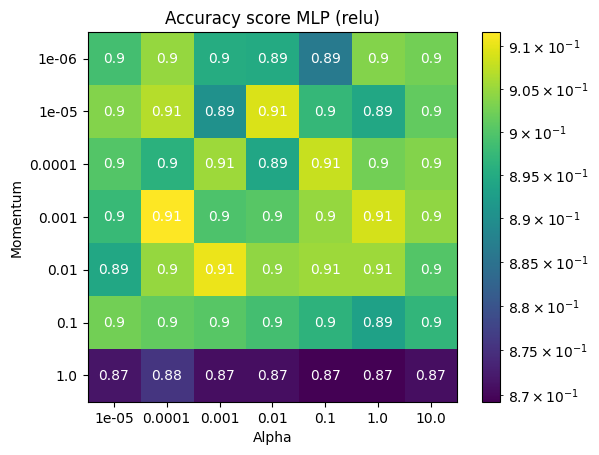

In [5]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose=True)

alpha:1e-05, momentum :1e-06 gives accuracy 0.91
alpha:1e-05, momentum :1e-05 gives accuracy 0.908
alpha:1e-05, momentum :0.0001 gives accuracy 0.9092
alpha:1e-05, momentum :0.001 gives accuracy 0.91
alpha:1e-05, momentum :0.01 gives accuracy 0.906
alpha:1e-05, momentum :0.1 gives accuracy 0.9052
alpha:1e-05, momentum :1.0 gives accuracy 0.912
alpha:0.0001, momentum :1e-06 gives accuracy 0.908
alpha:0.0001, momentum :1e-05 gives accuracy 0.9072
alpha:0.0001, momentum :0.0001 gives accuracy 0.8888
alpha:0.0001, momentum :0.001 gives accuracy 0.9068
alpha:0.0001, momentum :0.01 gives accuracy 0.9096
alpha:0.0001, momentum :0.1 gives accuracy 0.9064
alpha:0.0001, momentum :1.0 gives accuracy 0.9048
alpha:0.001, momentum :1e-06 gives accuracy 0.904
alpha:0.001, momentum :1e-05 gives accuracy 0.9112
alpha:0.001, momentum :0.0001 gives accuracy 0.9104
alpha:0.001, momentum :0.001 gives accuracy 0.906
alpha:0.001, momentum :0.01 gives accuracy 0.9104
alpha:0.001, momentum :0.1 gives accuracy 

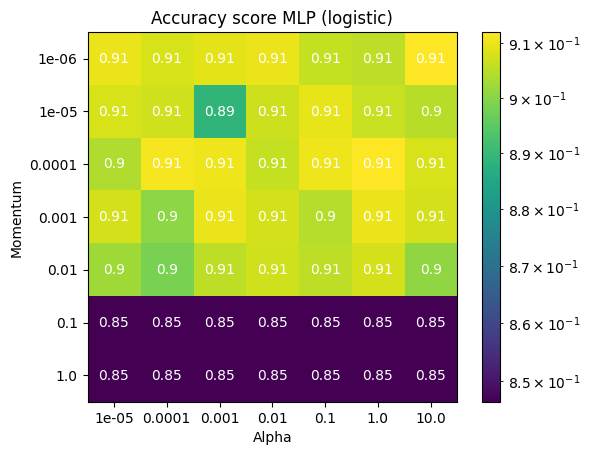

In [6]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (logistic)", func="logistic", verbose=True)


alpha:1e-05, momentum :1e-06 gives accuracy 0.9072
alpha:1e-05, momentum :1e-05 gives accuracy 0.8992
alpha:1e-05, momentum :0.0001 gives accuracy 0.9016
alpha:1e-05, momentum :0.001 gives accuracy 0.9036
alpha:1e-05, momentum :0.01 gives accuracy 0.9024
alpha:1e-05, momentum :0.1 gives accuracy 0.9
alpha:1e-05, momentum :1.0 gives accuracy 0.9092
alpha:0.0001, momentum :1e-06 gives accuracy 0.9004
alpha:0.0001, momentum :1e-05 gives accuracy 0.9068
alpha:0.0001, momentum :0.0001 gives accuracy 0.9004
alpha:0.0001, momentum :0.001 gives accuracy 0.9096
alpha:0.0001, momentum :0.01 gives accuracy 0.902
alpha:0.0001, momentum :0.1 gives accuracy 0.8952
alpha:0.0001, momentum :1.0 gives accuracy 0.9012
alpha:0.001, momentum :1e-06 gives accuracy 0.9108
alpha:0.001, momentum :1e-05 gives accuracy 0.9044
alpha:0.001, momentum :0.0001 gives accuracy 0.9048
alpha:0.001, momentum :0.001 gives accuracy 0.902
alpha:0.001, momentum :0.01 gives accuracy 0.9032
alpha:0.001, momentum :0.1 gives accu

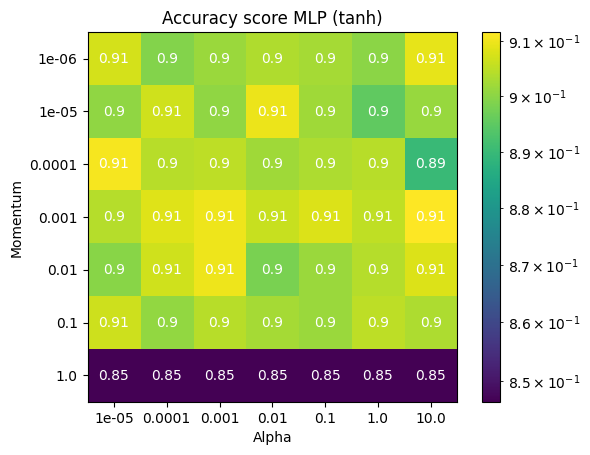

In [7]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (tanh)", func="tanh", verbose=True)


In [ ]:
model = MLPClassifier(activation="relu", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation="tanh", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
